In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

# Parameters
n_samples = 500       # total points
n_clusters = 3        # number of clusters
cluster_std = 1.0     # standard deviation of clusters
noise_ratio = 0.1     # fraction of noise points

# Generate clustered data
X, y = make_blobs(n_samples=int(n_samples*(1-noise_ratio)), 
                  centers=n_clusters, 
                  cluster_std=cluster_std, 
                  random_state=42)

# Generate noise points randomly
n_noise = int(n_samples * noise_ratio)
X_noise = np.random.uniform(low=X.min()-5, high=X.max()+5, size=(n_noise, 2))
y_noise = [-1]*n_noise   # label -1 for noise

# Combine clusters + noise
X_total = np.vstack([X, X_noise])
y_total = np.hstack([y, y_noise])

# Create DataFrame
df = pd.DataFrame(X_total, columns=["Feature1", "Feature2"])
df["Cluster"] = y_total

# Save to CSV
df.to_csv("data.csv", index=False)

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('data.csv')
df.head()

,Feature1,Feature2,Cluster
0,-2.232507,9.841469,0
1,3.817658,2.216857,1
2,5.470215,1.117086,1
3,4.621366,1.684511,1
4,3.988043,2.020568,1


In [10]:
import matplotlib.pyplot as plt

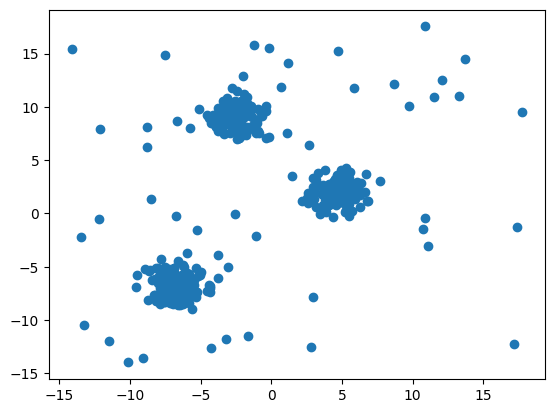

In [11]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [12]:
from sklearn.ensemble import IsolationForest

In [14]:
clf = IsolationForest(contamination=0.1)

In [15]:
clf.fit(df)

,n_estimators,100
,max_samples,'auto'
,contamination,0.1
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [16]:
pred = clf.predict(df)

In [17]:
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [18]:
 import numpy as np

In [19]:
ind = np.where(pred < 0)

In [20]:
ind

(array([211, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461,
        462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474,
        475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487,
        489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]),)

In [21]:
x = df.values

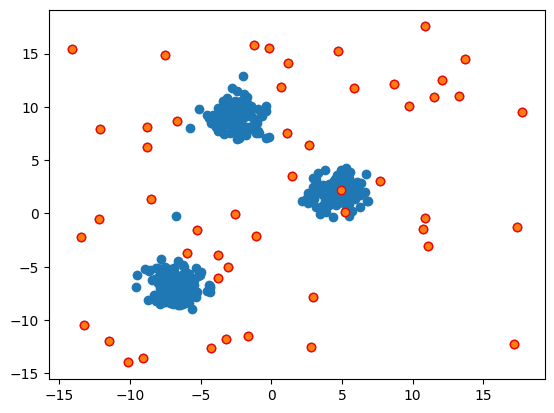

In [23]:
ind = np.where(pred < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[ind,0], x[ind,1], edgecolors='r')